C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_7336\415664906.py:12: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_data = pd.read_csv("Ames Real Estate Data.csv")


Housing Data Overview:
   Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           3  911128020       1001     124900          30  C (all)   
3           4  535377150       1039     114000          70       RL   
4           5  534177230       1665     227000          60       RL   

   LotFrontage  LotArea Street Alley  ... ScreenPorch PoolArea PoolQC Fence  \
0          NaN     7890   Pave   NaN  ...         166        0    NaN   NaN   
1         42.0     4235   Pave   NaN  ...           0        0    NaN   NaN   
2         60.0     6060   Pave   NaN  ...           0        0    NaN   NaN   
3         80.0     8146   Pave   NaN  ...         111        0    NaN   NaN   
4         70.0     8400   Pave   NaN  ...           0        0    NaN   NaN   

  MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  
0         NaN 

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_7336\415664906.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)
C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_7336\415664906.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

Updated Columns in merged_data: Index(['Unnamed: 0', 'PID', 'GrLivArea', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea_x', 'Street', 'Alley', 'LotShape',
       ...
       'PA-PreD', 'PA-Strt', 'PA-StSfx', 'PA-PostD', 'PA-UnTyp', 'PA-UntNo',
       'Date', 'Source', 'NmbrBRs', 'SalePrice'],
      dtype='object', length=172)

SalePrice Statistics:
count      2603.000000
mean     178060.751825
std       75623.981190
min       12789.000000
25%      129950.000000
50%      159500.000000
75%      208950.000000
max      755000.000000
Name: SalePrice, dtype: float64

SalePrice Statistics:
count      2603.000000
mean     178060.751825
std       75623.981190
min       12789.000000
25%      129950.000000
50%      159500.000000
75%      208950.000000
max      755000.000000
Name: SalePrice, dtype: float64


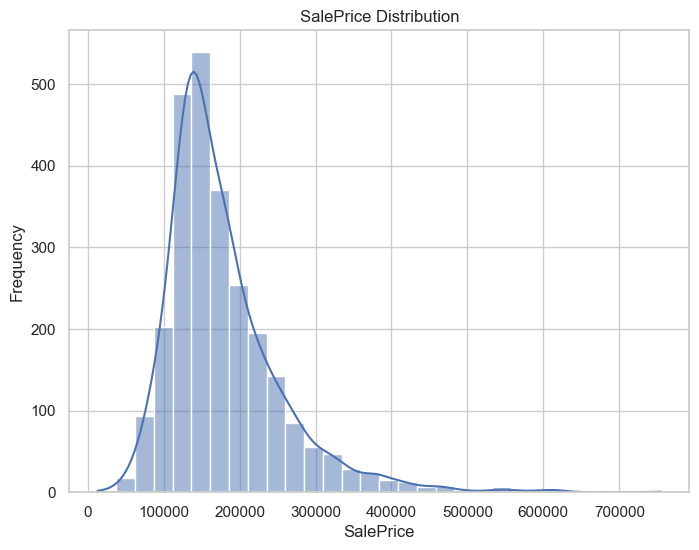

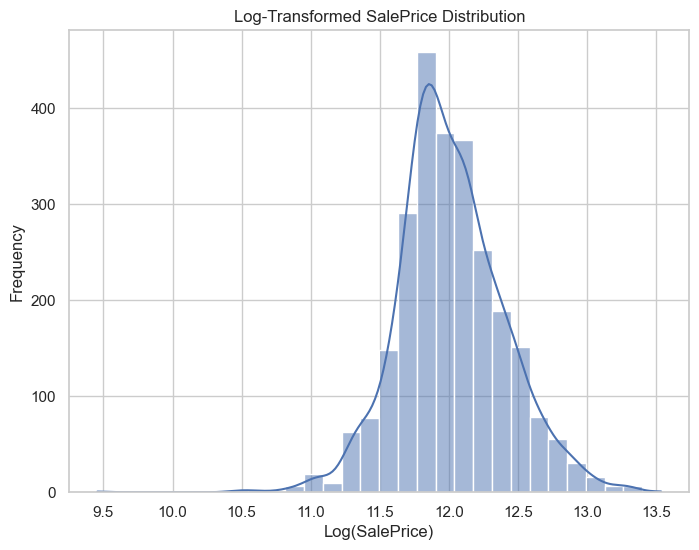

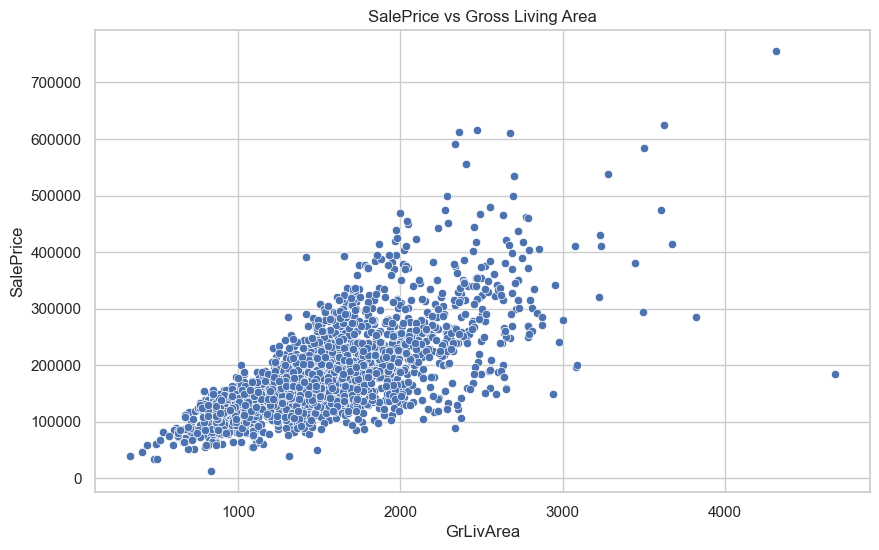

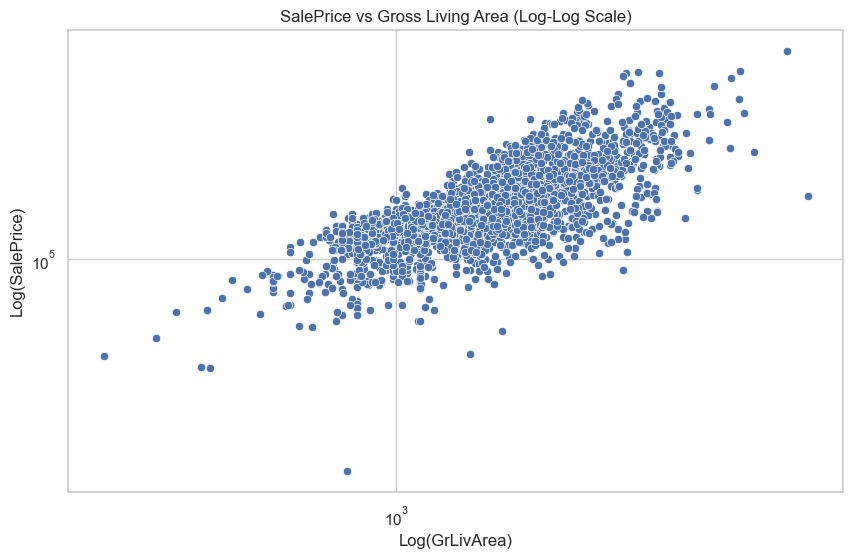

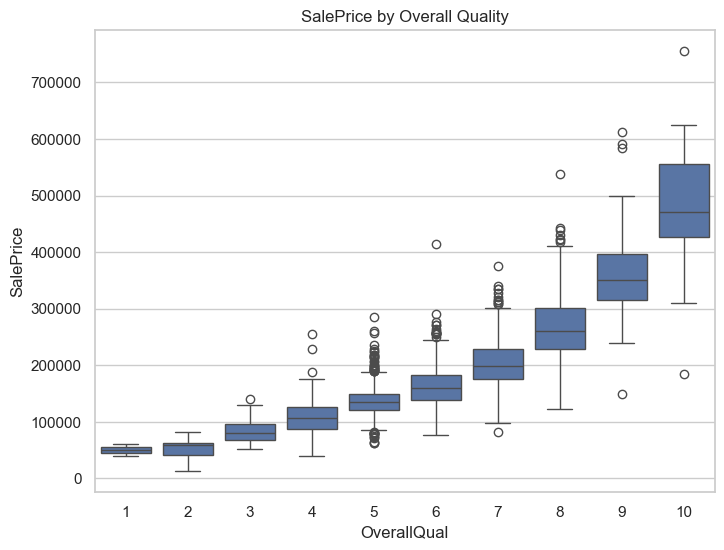

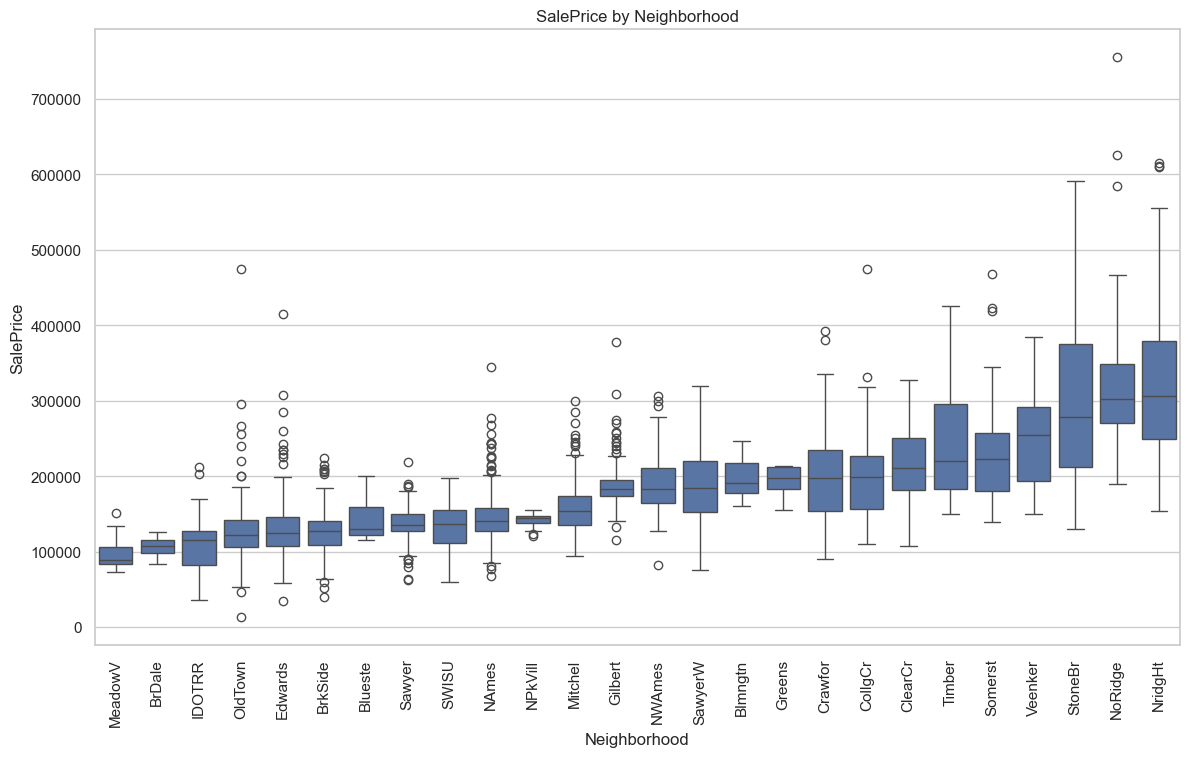

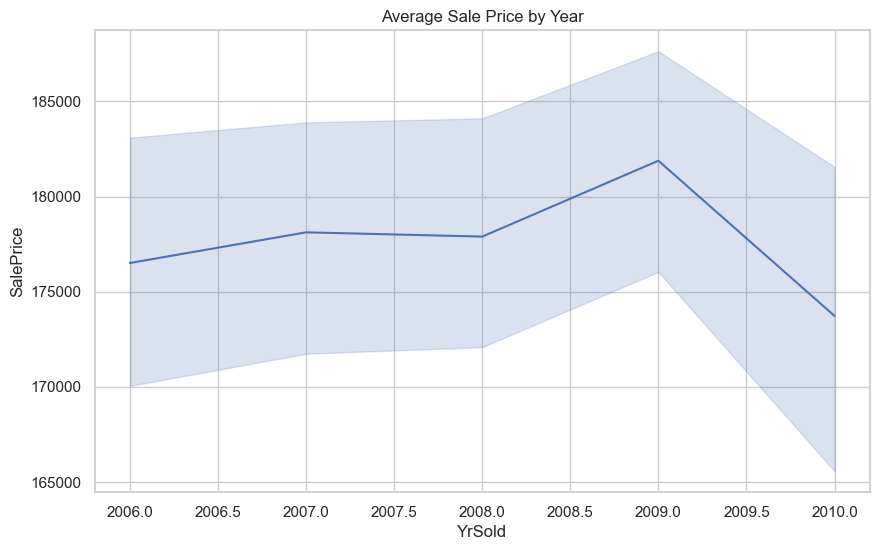

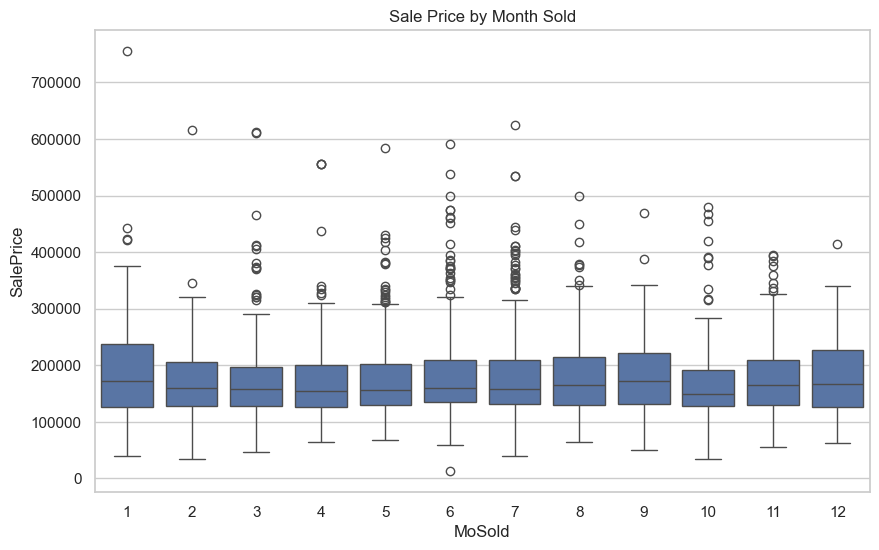

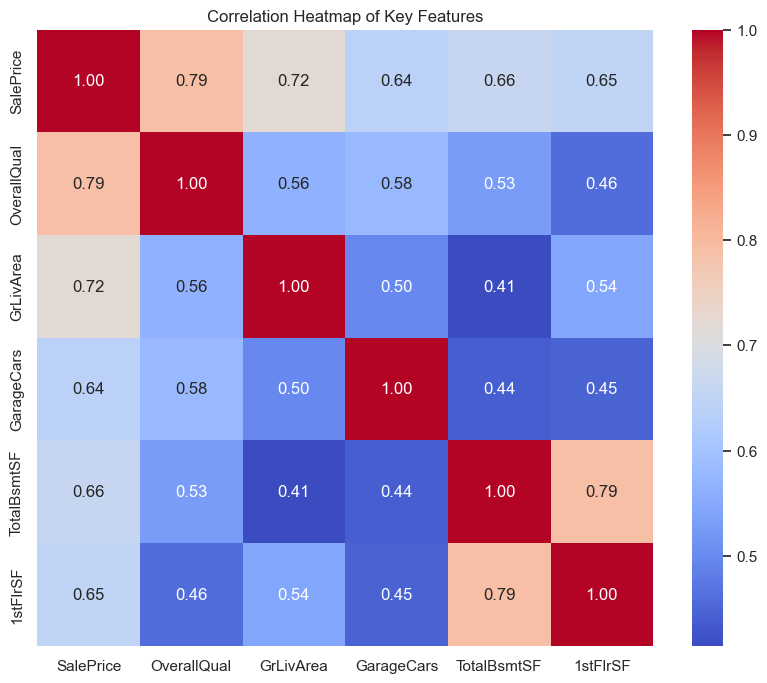

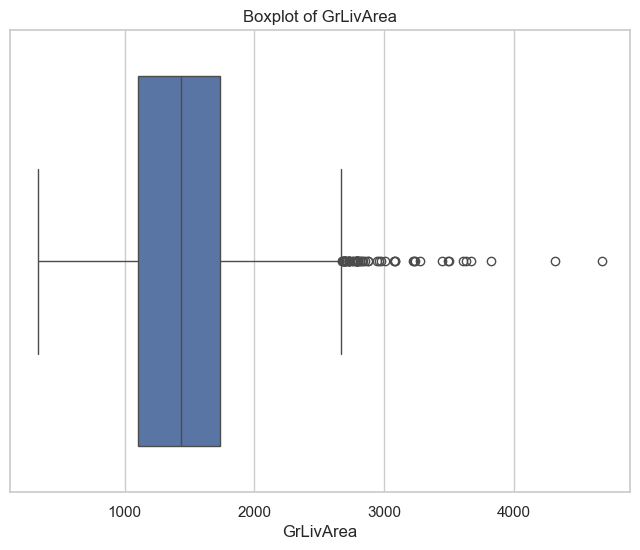


Outliers in GrLivArea:
      GrLivArea  SalePrice
68         2748     390000
168        2872     272000
217        2696     500000
231        2810     302000
247        2956     342000
278        2944     150000
304        3005     280750
313        4676     184750
392        3672     415000
410        2698     535000
411        2698     535000
427        2690     398800
493        2728     437154
527        3447     381000
579        3222     320000
597        2784     250000
626        2787     269500
637        2855     405000
732        2758     418000
785        2826     334000
807        3279     538000
853        2687     327000
936        2727     315000
962        2787     269500
1013       4316     755000
1108       2715     299800
1155       2772     462000
1157       2794     403000
1173       3493     295000
1216       3082     197000
1256       2730     301000
1323       2687     270000
1329       3228     430000
1330       3078     410000
1338       3627     625000
1385

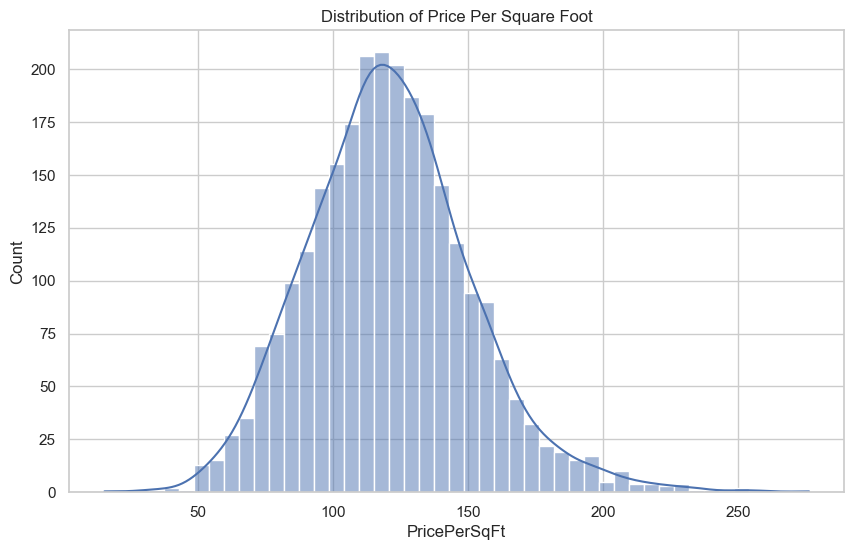

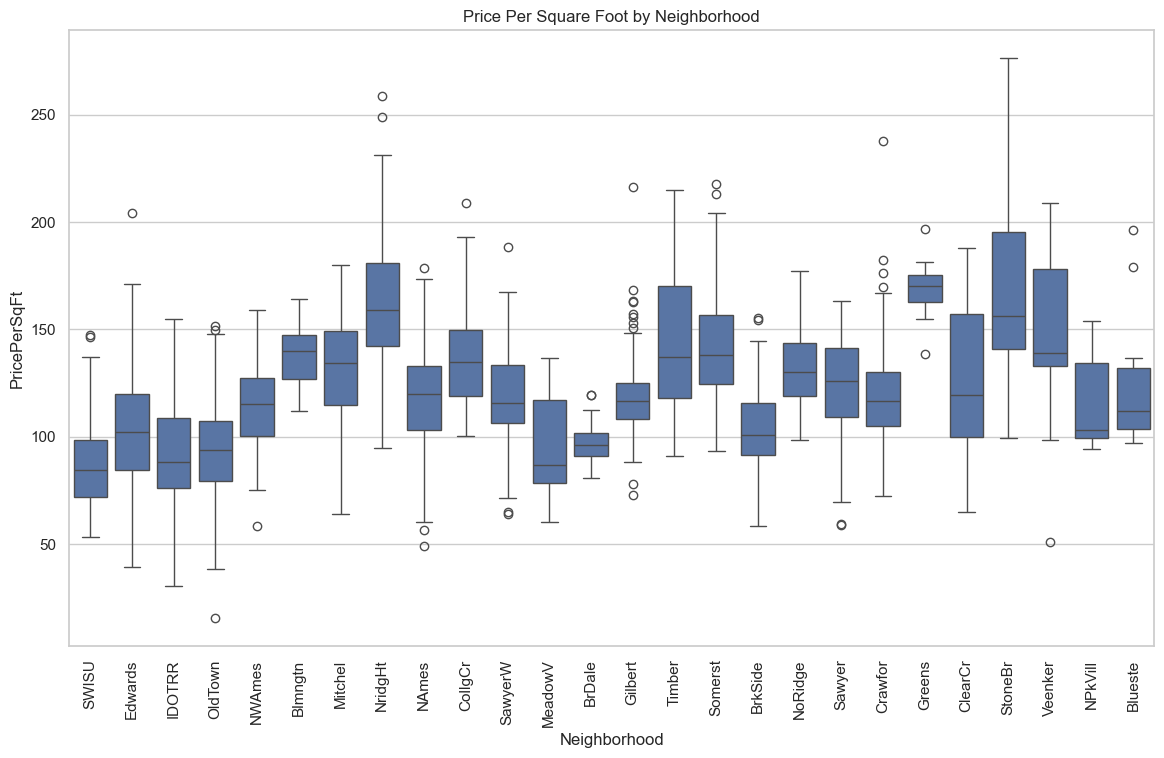

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Load the datasets
housing_data = pd.read_csv("Ames_HousePrice.csv")
real_estate_data = pd.read_csv("Ames Real Estate Data.csv")

# Data Overview
print("Housing Data Overview:")
print(housing_data.head())
print("\nReal Estate Data Overview:")
print(real_estate_data.head())

# Check for missing values
print("\nMissing Values in Housing Data:")
print(housing_data.isnull().sum())
print("\nMissing Values in Real Estate Data:")
print(real_estate_data.isnull().sum())

# Merge datasets on PID and MapRefNo
merged_data = housing_data.merge(real_estate_data, left_on='PID', right_on='MapRefNo', how='inner')
print("\nMerged Data Overview:")
print(merged_data.head())

# Check merged dataset summary
print("\nMerged Data Summary:")
print(merged_data.describe())


# Data Cleaning: Impute missing values
# Separate numeric and categorical columns for data cleaning
numeric_cols = merged_data.select_dtypes(include=['number']).columns
categorical_cols = merged_data.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the mean
merged_data[numeric_cols] = merged_data[numeric_cols].fillna(merged_data[numeric_cols].mean())

# Fill missing values for categorical columns with the mode
for col in categorical_cols:
    if not merged_data[col].mode().empty:  # Check if mode is not empty
        merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)
    else:
        # Fill with a placeholder if mode is empty (column is entirely NaNs)
        merged_data[col].fillna("Unknown", inplace=True)


# Combine 'SalePrice_x' and 'SalePrice_y' into a single 'SalePrice' column
if 'SalePrice_x' in merged_data.columns and 'SalePrice_y' in merged_data.columns:
    merged_data['SalePrice'] = merged_data['SalePrice_x'].combine_first(merged_data['SalePrice_y'])
elif 'SalePrice_x' in merged_data.columns:
    merged_data['SalePrice'] = merged_data['SalePrice_x']
elif 'SalePrice_y' in merged_data.columns:
    merged_data['SalePrice'] = merged_data['SalePrice_y']
else:
    print("Neither SalePrice_x nor SalePrice_y columns found.")

# Drop the old 'SalePrice_x' and 'SalePrice_y' columns
merged_data.drop(columns=['SalePrice_x', 'SalePrice_y'], errors='ignore', inplace=True)

# Verify the new SalePrice column
print("Updated Columns in merged_data:", merged_data.columns)
print("\nSalePrice Statistics:")
print(merged_data['SalePrice'].describe())

# Exploratory Data Analysis

# SalePrice Analysis
print("\nSalePrice Statistics:")
print(merged_data['SalePrice'].describe())

# Plot SalePrice Distribution
plt.figure(figsize=(8,6))
sns.histplot(merged_data['SalePrice'], kde=True, bins=30)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Log Transformation of SalePrice to address skewness
merged_data['LogSalePrice'] = np.log(merged_data['SalePrice'])

# Plot Log-Transformed SalePrice Distribution
plt.figure(figsize=(8,6))
sns.histplot(merged_data['LogSalePrice'], kde=True, bins=30)
plt.title("Log-Transformed SalePrice Distribution")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot of SalePrice vs. GrLivArea
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_data, x='GrLivArea', y='SalePrice')
plt.title("SalePrice vs Gross Living Area")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

# Log-Log Plot for SalePrice vs GrLivArea
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_data, x='GrLivArea', y='SalePrice')
plt.yscale('log')
plt.xscale('log')
plt.title("SalePrice vs Gross Living Area (Log-Log Scale)")
plt.xlabel("Log(GrLivArea)")
plt.ylabel("Log(SalePrice)")
plt.show()


# OverallQual Analysis
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_data, x='OverallQual', y='SalePrice')
plt.title("SalePrice by Overall Quality")
plt.show()

# Verify and rename Neighborhood if necessary
if 'Neighborhood_x' in merged_data.columns:
    merged_data.rename(columns={'Neighborhood_x': 'Neighborhood'}, inplace=True)
elif 'Neighborhood_y' in merged_data.columns:
    merged_data.rename(columns={'Neighborhood_y': 'Neighborhood'}, inplace=True)

# Neighborhood Analysis: SalePrice by Neighborhood
plt.figure(figsize=(14,8))
order = merged_data.groupby('Neighborhood')['SalePrice'].median().sort_values().index
sns.boxplot(x='Neighborhood', y='SalePrice', data=merged_data , order=order)
plt.xticks(rotation=90)
plt.title("SalePrice by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.show()



# Seasonality Analysis: Year and Month Sold
plt.figure(figsize=(10,6))
sns.lineplot(data=merged_data, x='YrSold', y='SalePrice', estimator='mean')
plt.title("Average Sale Price by Year")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_data, x='MoSold', y='SalePrice')
plt.title("Sale Price by Month Sold")
plt.show()

# Select only numeric columns from merged_data
numeric_data = merged_data.select_dtypes(include=[np.number])

# Manually select a subset of key features for a clearer heatmap
key_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']

plt.figure(figsize=(10,8))
sns.heatmap(numeric_data[key_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Key Features")
plt.show()


# Outlier Analysis

# Box Plot for GrLivArea to detect outliers using IQR
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_data, x='GrLivArea')
plt.title("Boxplot of GrLivArea")
plt.show()

# Identifying Outliers with IQR
Q1 = merged_data['GrLivArea'].quantile(0.25)
Q3 = merged_data['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
outliers = merged_data[(merged_data['GrLivArea'] < (Q1 - 1.5 * IQR)) | 
                       (merged_data['GrLivArea'] > (Q3 + 1.5 * IQR))]

print("\nOutliers in GrLivArea:")
print(outliers[['GrLivArea', 'SalePrice']])

# Feature Engineering for PricePerSqFt
merged_data['PricePerSqFt'] = merged_data['SalePrice'] / merged_data['GrLivArea']

plt.figure(figsize=(10,6))
sns.histplot(merged_data['PricePerSqFt'], kde=True)
plt.title("Distribution of Price Per Square Foot")
plt.show()

# Neighborhood PricePerSqFt Analysis
plt.figure(figsize=(14,8))
sns.boxplot(data=merged_data, x='Neighborhood', y='PricePerSqFt')
plt.xticks(rotation=90)
plt.title("Price Per Square Foot by Neighborhood")
plt.show()



# Optional: Save the cleaned dataset for modeling
#merged_data.to_csv("Cleaned_Ames_Housing_Data.csv", index=False)
#print("Cleaned data saved to 'Cleaned_Ames_Housing_Data.csv'")


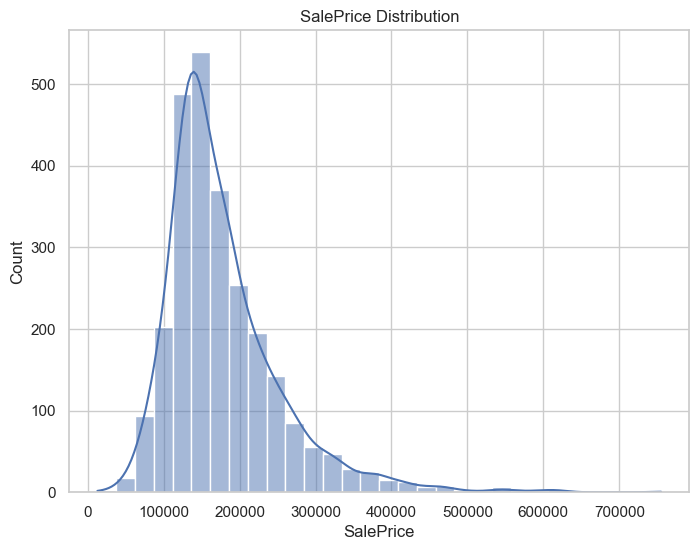

Skewness of SalePrice: 1.8323230679667712


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

plt.figure(figsize=(8, 6))
sns.histplot(merged_data['SalePrice'], kde=True, bins=30)
plt.title("SalePrice Distribution")
plt.show()

skewness = skew(merged_data['SalePrice'])
print("Skewness of SalePrice:", skewness)

# Apply log transformation if needed
if abs(skewness) > 0.75:
    merged_data['LogSalePrice'] = np.log(merged_data['SalePrice'])


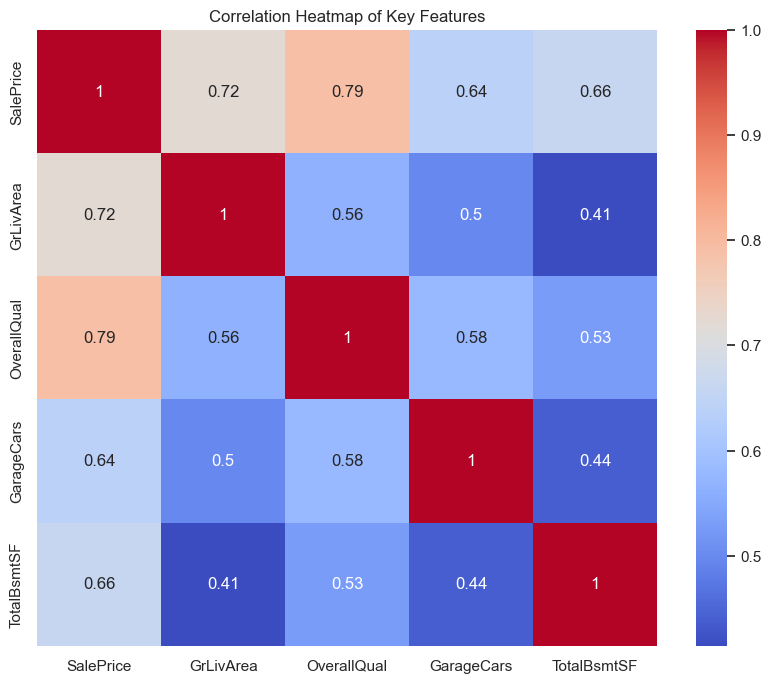

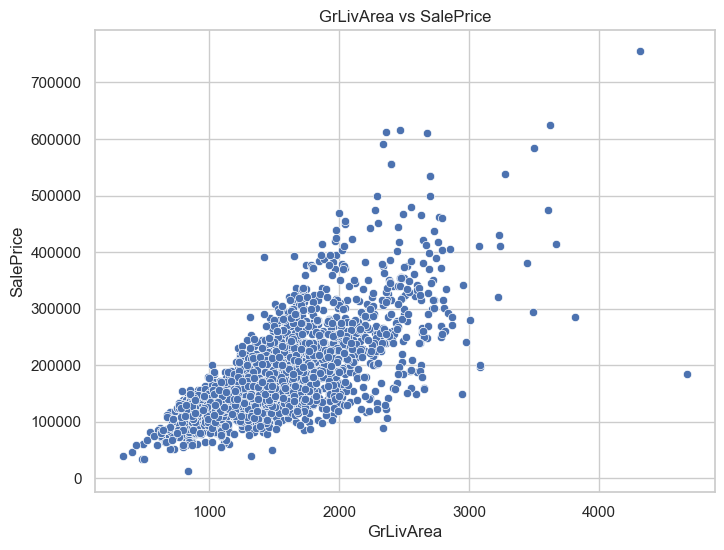

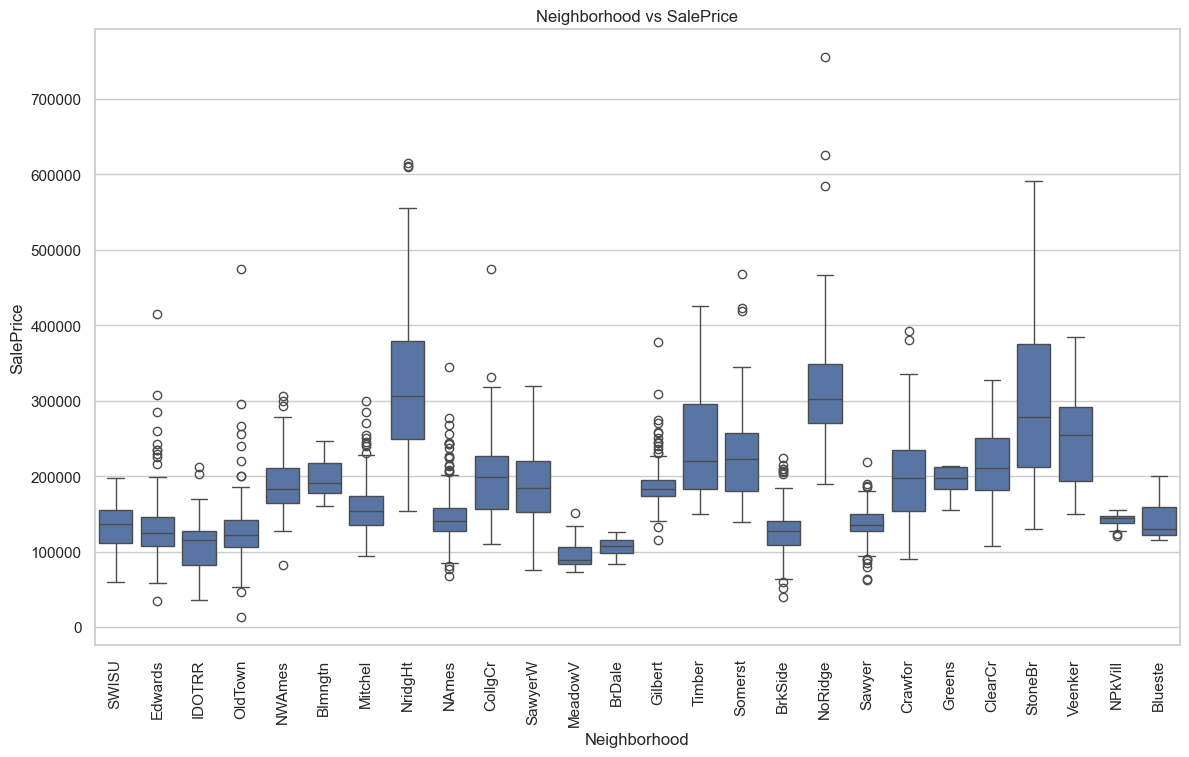

In [6]:
# Heatmap of top correlated features
key_features = ['SalePrice', 'GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF']
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data[key_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Features")
plt.show()

# Scatterplot for GrLivArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=merged_data)
plt.title("GrLivArea vs SalePrice")
plt.show()

# Boxplot for Neighborhood vs SalePrice
plt.figure(figsize=(14, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=merged_data)
plt.xticks(rotation=90)
plt.title("Neighborhood vs SalePrice")
plt.show()


In [6]:
# Handle _x and _y columns by combining them or retaining one version
for col in merged_data.columns:
    if col.endswith('_x') and col.replace('_x', '_y') in merged_data.columns:
        merged_data[col.replace('_x', '')] = merged_data[col].fillna(merged_data[col.replace('_x', '_y')])
        merged_data.drop(columns=[col, col.replace('_x', '_y')], inplace=True)

# Compute new features
new_features = pd.DataFrame()

# Property-Related Features
new_features['AgeOfHouse'] = merged_data['YrSold'] - merged_data['YearBuilt']
new_features['TimeSinceLastRemodel'] = merged_data['YrSold'] - merged_data['YearRemodAdd']
new_features['LotFrontageToLotAreaRatio'] = merged_data['LotFrontage'] / merged_data['LotArea'].replace(0, 1)
new_features['NeighborhoodMeanPrice'] = merged_data.groupby('Neighborhood')['SalePrice'].transform('mean')
new_features['LotShapeCategory'] = merged_data['LotShape'].apply(lambda x: 'Regular' if x == 'Reg' else 'Irregular')

# Condition and Quality Features
new_features['QualityConditionInteraction'] = merged_data['OverallQual'] * merged_data['OverallCond']
new_features['ExterQualCond'] = merged_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}) + \
                                merged_data['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
new_features['FoundationStability'] = merged_data['Foundation'].apply(lambda x: 'Stable' if x in ['PConc', 'CBlock'] else 'Unstable')
new_features['RenovationIndicator'] = (merged_data['YearBuilt'] != merged_data['YearRemodAdd']).astype(int)

# Basement Features
new_features['TotalBasementFinishedArea'] = merged_data['BsmtFinSF1'] + merged_data['BsmtFinSF2']
new_features['BasementUsabilityRatio'] = merged_data['TotalBsmtSF'] / merged_data['GrLivArea'].replace(0, 1)
new_features['BasementQuality'] = merged_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}).fillna(0) + \
                                  merged_data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}).fillna(0) + \
                                  merged_data['BsmtExposure'].map({'Gd': 5, 'Av': 4, 'Mn': 3, 'No': 1}).fillna(0)
new_features['BasementBathRatio'] = (merged_data['BsmtFullBath'] + merged_data['BsmtHalfBath']) / merged_data['TotalBsmtSF'].replace(0, 1)

# Garage Features
new_features['GarageAge'] = merged_data['YrSold'] - merged_data['GarageYrBlt']
new_features['GarageToLivingAreaRatio'] = merged_data['GarageArea'] / merged_data['GrLivArea'].replace(0, 1)
new_features['GarageQuality'] = merged_data['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}).fillna(0) + \
                                merged_data['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}).fillna(0) + \
                                merged_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1}).fillna(0)

# Room and Utility Features
new_features['TotalBathCount'] = merged_data['FullBath'] + merged_data['HalfBath'] + \
                                 merged_data['BsmtFullBath'] + merged_data['BsmtHalfBath']
new_features['BedroomToBathroomRatio'] = merged_data['BedroomAbvGr'] / new_features['TotalBathCount'].replace(0, 1)
new_features['KitchenQualityWeightedScore'] = merged_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}) * merged_data['KitchenAbvGr']
new_features['FunctionalUsabilityIndex'] = merged_data['Functional'].apply(lambda x: 1 if x == 'Typ' else 0)

# Outdoor and Feature-Based Features
new_features['TotalOutdoorSpace'] = merged_data['WoodDeckSF'] + merged_data['OpenPorchSF'] + merged_data['EnclosedPorch'] + \
                                    merged_data['3SsnPorch'] + merged_data['ScreenPorch']
new_features['PoolPresence'] = (merged_data['PoolArea'] > 0).astype(int)
new_features['FencePresence'] = merged_data['Fence'].notnull().astype(int)

# Temporal and Seasonal Features
bins = [0, 2, 5, 8, 11]
labels = ['Winter', 'Spring', 'Summer', 'Fall']
new_features['SeasonOfSale'] = pd.cut(merged_data['MoSold'], bins=bins, labels=labels, right=False)
new_features['TimeSinceMarketPeak'] = merged_data['YrSold'] - merged_data['YearBuilt']

# Combined or Interaction Features
new_features['LivingSpaceEfficiency'] = merged_data['GrLivArea'] / merged_data['LotArea'].replace(0, 1)
new_features['TotalSquareFootage'] = merged_data['GrLivArea'] + merged_data['GarageArea'] + merged_data['TotalBsmtSF']
new_features['ConditionAndAgeInteraction'] = (merged_data['OverallCond'] + merged_data['OverallQual']) / new_features['AgeOfHouse'].replace(0, 1)

# Concatenate new features with the original DataFrame
merged_data = pd.concat([merged_data, new_features], axis=1)





In [6]:
print("Columns in merged_data:", merged_data.columns)


Columns in merged_data: Index(['Unnamed: 0', 'PID', 'GrLivArea', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       ...
       'KitchenQualityWeightedScore', 'FunctionalUsabilityIndex',
       'TotalOutdoorSpace', 'PoolPresence', 'FencePresence', 'SeasonOfSale',
       'TimeSinceMarketPeak', 'LivingSpaceEfficiency', 'TotalSquareFootage',
       'ConditionAndAgeInteraction'],
      dtype='object', length=189)


In [8]:
# Check if 'SalePrice_y' is in the columns of merged_data
if 'PoolArea_x' in merged_data.columns:
    print("Neighborhood column exists in merged_data")
else:
    print("Neighborhood column does not exist in merged_data")


Neighborhood column does not exist in merged_data


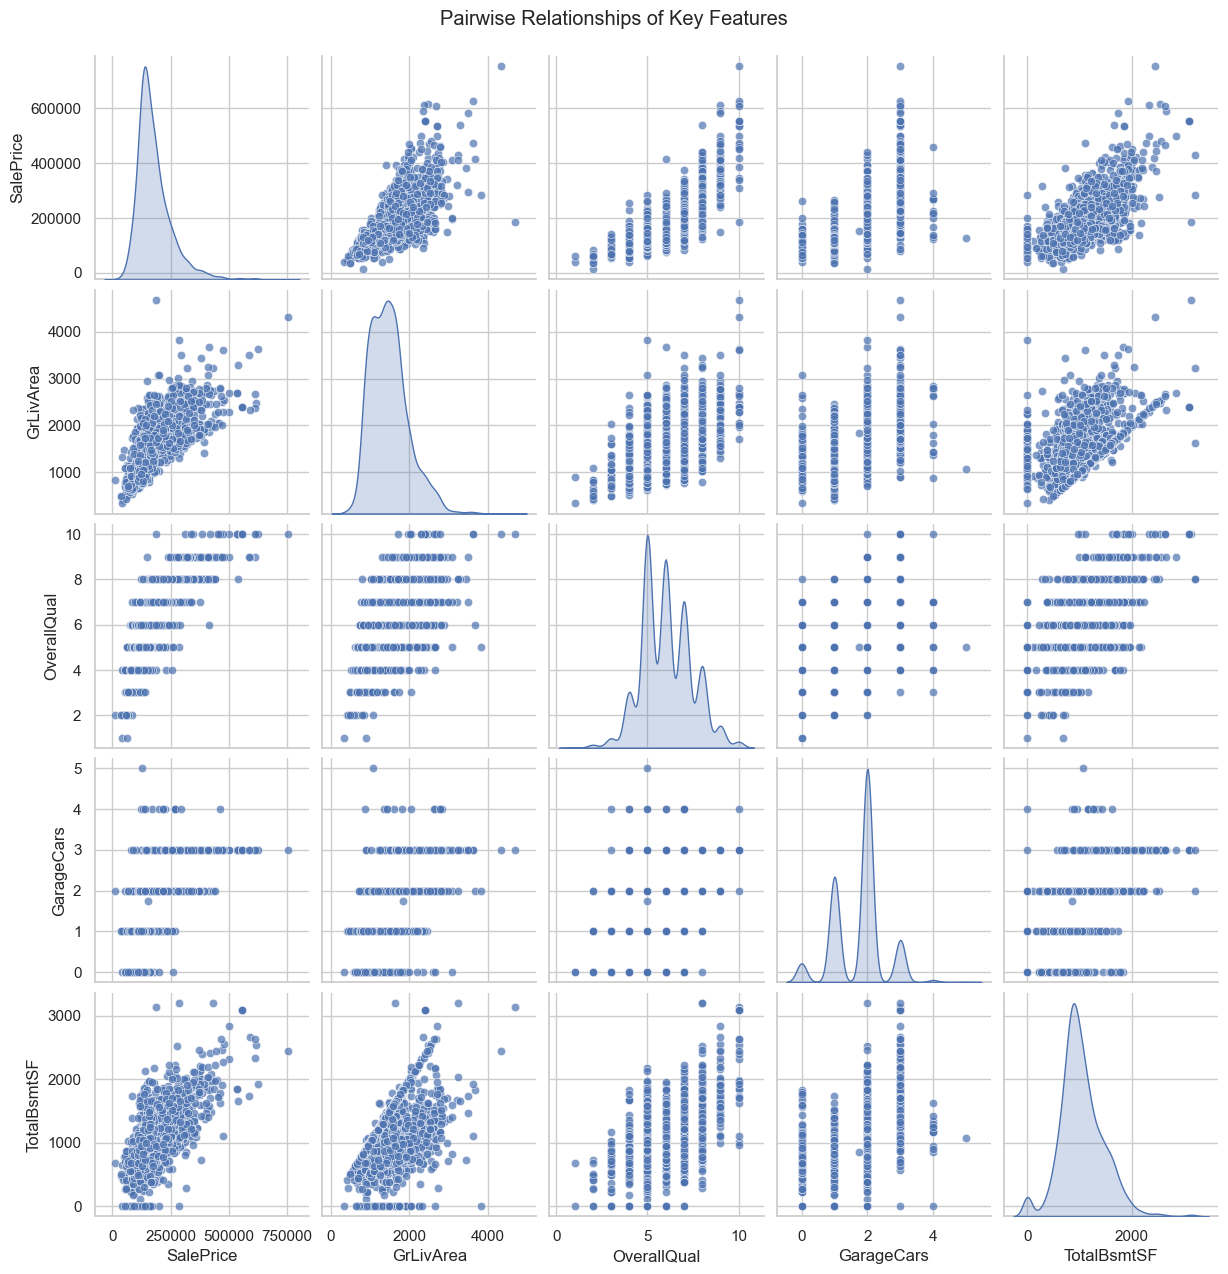

NameError: name 'continuous_features' is not defined

In [8]:
# Pairwise relationships between key features
#important_features = ['SalePrice', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars']
sns.pairplot(merged_data[key_features], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise Relationships of Key Features", y=1.02)
plt.show()

# Verify and rename GarageArea if necessary
if 'GarageArea_x' in merged_data.columns:
    merged_data.rename(columns={'GarageArea_x': 'GarageArea'}, inplace=True)
elif 'GarageArea_y' in merged_data.columns:
    merged_data.rename(columns={'GarageArea_y': 'GarageArea'}, inplace=True)
    
import pandas.api.types as ptypes

# Ensure all features in continuous_features exist and are numeric
valid_features = [feature for feature in continuous_features if feature in merged_data.columns]
valid_features = [
    feature for feature in valid_features if ptypes.is_numeric_dtype(merged_data[feature])
]

print("Valid features for pair plot:", valid_features)

# Pair plot for valid continuous features
sns.pairplot(merged_data[valid_features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plots of Continuous Features", y=1.02)
plt.show()


# Verify and rename LotArea if necessary
if 'LotArea_x' in merged_data.columns:
    merged_data.rename(columns={'LotArea_x': 'LotArea'}, inplace=True)
elif 'LotArea_y' in merged_data.columns:
    merged_data.rename(columns={'LotArea_y': 'LotArea'}, inplace=True)

# Verify and rename PoolArea if necessary
if 'PoolArea_x' in merged_data.columns:
    merged_data.rename(columns={'PoolArea_x': 'PoolArea'}, inplace=True)
elif 'PoolArea_y' in merged_data.columns:
    merged_data.rename(columns={'PoolArea_y': 'PoolArea'}, inplace=True)


# Define luxury homes as top 10% in SalePrice
luxury_threshold = merged_data['SalePrice'].quantile(0.9)
luxury_homes = merged_data[merged_data['SalePrice'] > luxury_threshold]

# Compare key features for luxury homes
luxury_features = ['GrLivArea', 'OverallQual', 'LotArea', 'PoolArea', 'GarageCars']
plt.figure(figsize=(10, 6))
sns.boxplot(data=luxury_homes[luxury_features], orient='v')
plt.title("Feature Comparison for Luxury Homes")
plt.show()

# Value per square foot for luxury homes
luxury_homes['PricePerSqFt'] = luxury_homes['SalePrice'] / luxury_homes['GrLivArea']
plt.figure(figsize=(8, 6))
sns.histplot(luxury_homes['PricePerSqFt'], kde=True, bins=20)
plt.title("Price Per Square Foot for Luxury Homes")
plt.xlabel("PricePerSqFt")
plt.show()


In [14]:
import geopandas as gpd
import folium

# Create a GeoDataFrame
geo_data = gpd.GeoDataFrame(
    merged_data, 
    geometry=gpd.points_from_xy(merged_data['Longitude'], merged_data['Latitude'])
)

# Visualize SalePrice on a map
m = folium.Map(location=[geo_data['Latitude'].mean(), geo_data['Longitude'].mean()], zoom_start=12)
for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        color='blue' if row['SalePrice'] < 200000 else 'green' if row['SalePrice'] < 400000 else 'red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Display the map
m

KeyError: 'Longitude'

In [86]:
# Optional: Save the cleaned dataset for modeling
merged_data.to_csv("Cleaned_Ames_Housing_Data.csv", index=False)
print("Cleaned data saved to 'Cleaned_Ames_Housing_Data.csv'")

Cleaned data saved to 'Cleaned_Ames_Housing_Data.csv'


In [12]:
print([x for x in merged_data.columns])

['Unnamed: 0', 'PID', 'GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleCondition', 'MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'Zng

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = [
    'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'AgeOfHouse',
    'TimeSinceLastRemodel', 'LotFrontageToLotAreaRatio', 'TotalOutdoorSpace',
    'LivingSpaceEfficiency'
]

# Ensure selected features exist
for feature in features:
    if feature not in merged_data.columns:
        print(f"Feature '{feature}' is missing in merged_data.")

X = merged_data[features]
y = merged_data['SalePrice']

# Handle missing values (if any)
X = X.fillna(X.median())
y = y.fillna(y.median())  # Optional; typically, missing target rows are removed.

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (optional for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [20]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Print coefficients and intercept for interpretability
print("Intercept:", linear_model.intercept_)
print("Coefficients:", dict(zip(features, linear_model.coef_)))


Intercept: 178530.10038424592
Coefficients: {'GrLivArea': 26748.467890322307, 'OverallQual': 23631.436741500773, 'TotalBsmtSF': 15984.959899993353, 'GarageCars': 6249.456296187274, 'AgeOfHouse': -7670.688797428612, 'TimeSinceLastRemodel': -6103.380374290673, 'LotFrontageToLotAreaRatio': 937.2364037909616, 'TotalOutdoorSpace': 4442.403948254031, 'LivingSpaceEfficiency': -7671.614268244861}


Mean Squared Error: 1183913837.4119911
R^2 Score: 0.8172287672074494


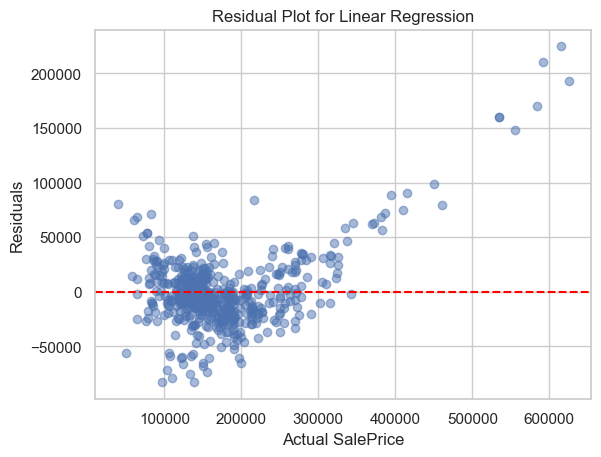

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()


Feature Importance:
                      Feature   Coefficient  AbsoluteCoefficient
0                  GrLivArea  26748.467890         26748.467890
1                OverallQual  23631.436742         23631.436742
2                TotalBsmtSF  15984.959900         15984.959900
8      LivingSpaceEfficiency  -7671.614268          7671.614268
4                 AgeOfHouse  -7670.688797          7670.688797
3                 GarageCars   6249.456296          6249.456296
5       TimeSinceLastRemodel  -6103.380374          6103.380374
7          TotalOutdoorSpace   4442.403948          4442.403948
6  LotFrontageToLotAreaRatio    937.236404           937.236404


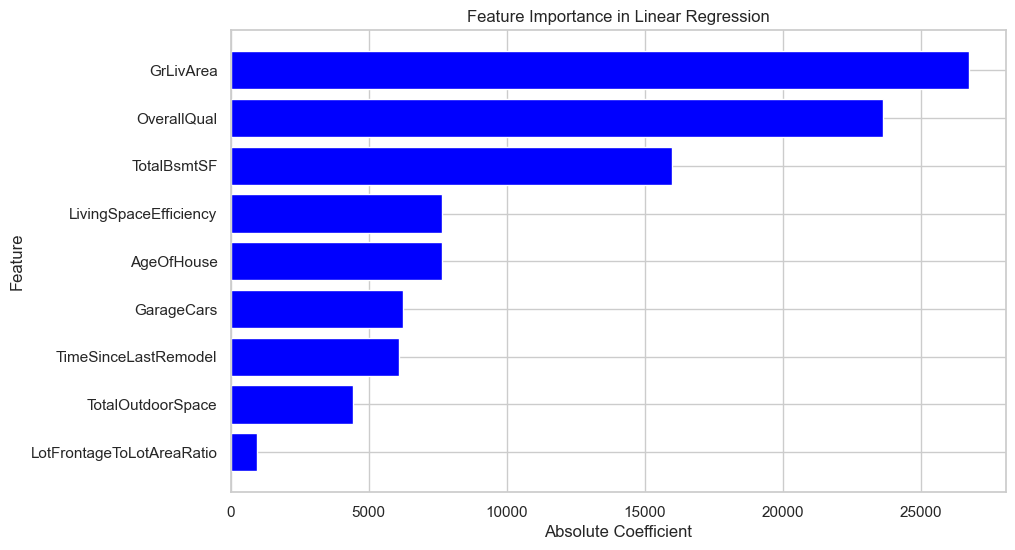

In [26]:
# Align features with columns used in training
features = X_train.columns.tolist()

feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': linear_model.coef_
})
feature_importance['AbsoluteCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='AbsoluteCoefficient', ascending=False)

print("Feature Importance:\n", feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['AbsoluteCoefficient'], color='blue')
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.gca().invert_yaxis()
plt.show()


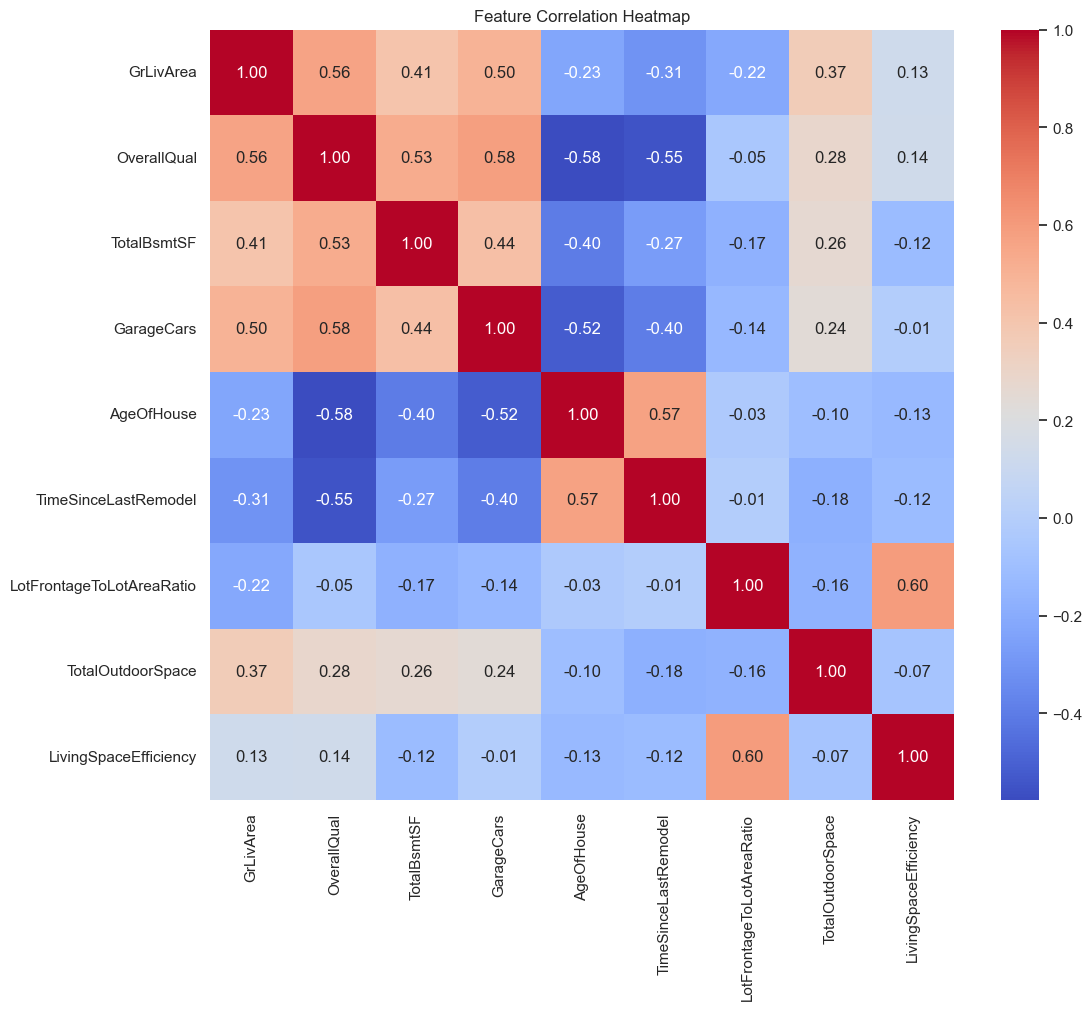

In [28]:
# Correlation heatmap to detect multicollinearity
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Features and target variable (already prepared)
# X_train_scaled, X_test_scaled, y_train, y_test


In [29]:
# Initialize Ridge regression model
ridge_model = Ridge()

# Define alpha values for grid search
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Use GridSearchCV for cross-validation to find the best alpha
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model with training data
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

Best Alpha: 10
Mean Squared Error (MSE): 1075518599.4040046
R^2 Score: 0.833962697205995


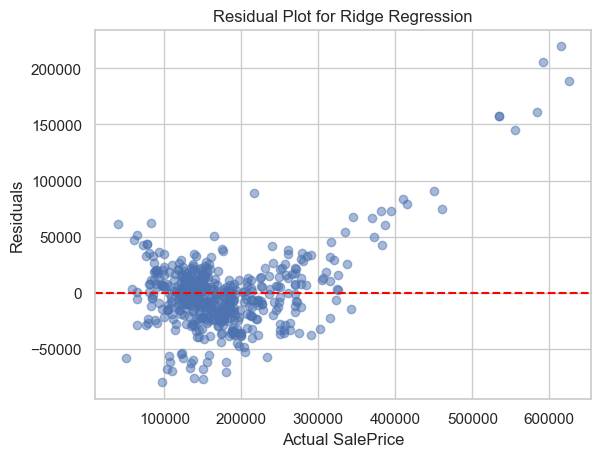

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Get the best Ridge model
best_ridge_model = grid_search.best_estimator_
print("Best Alpha:", grid_search.best_params_['alpha'])

# Make predictions on the test set
y_pred = best_ridge_model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot for Ridge Regression")
plt.show()


Ridge Regression Feature Importance:
                      Feature   Coefficient  AbsoluteCoefficient
0                  GrLivArea  24215.536887         24215.536887
1                OverallQual  18886.523279         18886.523279
7      NeighborhoodMeanPrice  15028.517440         15028.517440
2                TotalBsmtSF  14753.482319         14753.482319
9      LivingSpaceEfficiency  -5770.364855          5770.364855
5       TimeSinceLastRemodel  -5165.835675          5165.835675
3                 GarageCars   5016.982823          5016.982823
8          TotalOutdoorSpace   4296.193747          4296.193747
4                 AgeOfHouse  -2904.601725          2904.601725
6  LotFrontageToLotAreaRatio    227.835464           227.835464


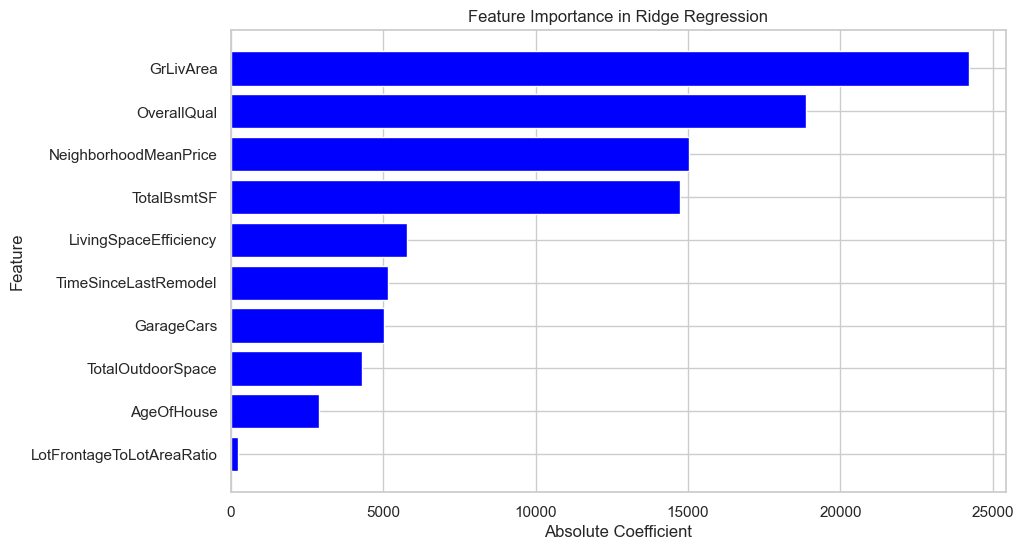

In [33]:
# Create a DataFrame for feature importance
features = X.columns.tolist()  # Ensure this aligns with the model input
ridge_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': best_ridge_model.coef_
})
ridge_importance['AbsoluteCoefficient'] = ridge_importance['Coefficient'].abs()
ridge_importance = ridge_importance.sort_values(by='AbsoluteCoefficient', ascending=False)

print("Ridge Regression Feature Importance:\n", ridge_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(ridge_importance['Feature'], ridge_importance['AbsoluteCoefficient'], color='blue')
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance in Ridge Regression")
plt.gca().invert_yaxis()
plt.show()


In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Initialize Lasso regression model
lasso_model = Lasso(max_iter=10000)

# Define alpha values for grid search
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Use GridSearchCV for cross-validation to find the best alpha
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model with training data
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

Best Alpha: 100
Mean Squared Error (MSE): 1075653731.4455771
R^2 Score: 0.8339418356795498


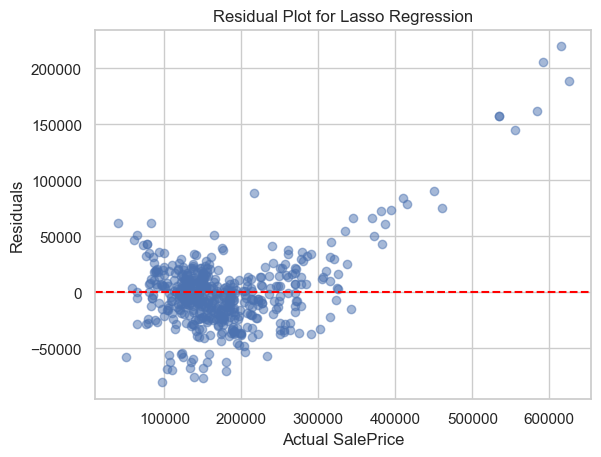

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Get the best Lasso model
best_lasso_model = grid_search.best_estimator_
print("Best Alpha:", grid_search.best_params_['alpha'])

# Make predictions on the test set
y_pred = best_lasso_model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot for Lasso Regression")
plt.show()


Retained Features:
                  Feature   Coefficient  AbsoluteCoefficient
0              GrLivArea  24189.018147         24189.018147
1            OverallQual  18972.248979         18972.248979
2            TotalBsmtSF  14761.535476         14761.535476
3             GarageCars   4938.972356          4938.972356
4             AgeOfHouse  -2794.400198          2794.400198
5   TimeSinceLastRemodel  -5100.436059          5100.436059
7  NeighborhoodMeanPrice  15096.956889         15096.956889
8      TotalOutdoorSpace   4201.969125          4201.969125
9  LivingSpaceEfficiency  -5554.877430          5554.877430


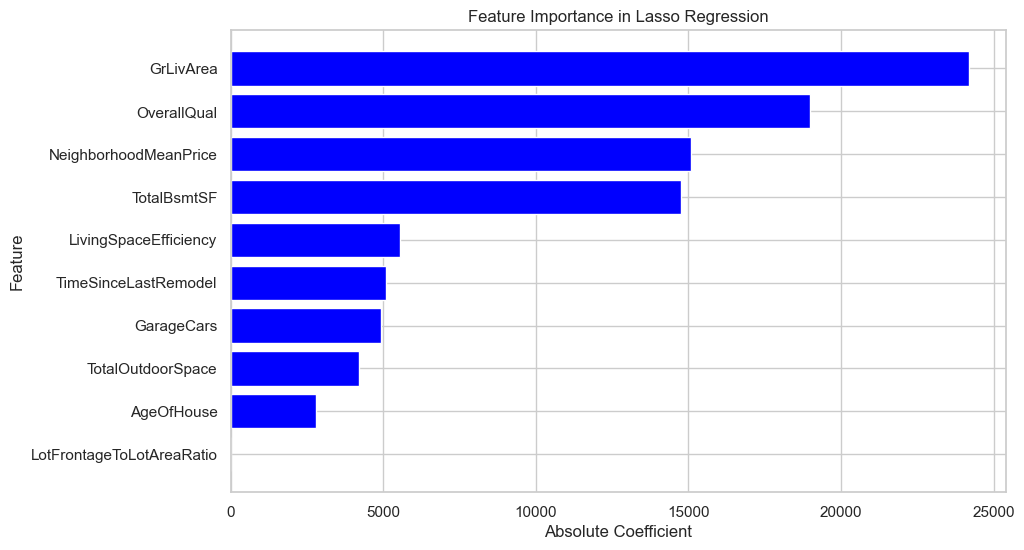

In [39]:
# Create a DataFrame for feature importance
features = X.columns.tolist()  # Ensure this aligns with the model input
lasso_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': best_lasso_model.coef_
})
lasso_importance['AbsoluteCoefficient'] = lasso_importance['Coefficient'].abs()

# Retained features (non-zero coefficients)
retained_features = lasso_importance[lasso_importance['Coefficient'] != 0]
print("Retained Features:\n", retained_features)

# Visualize feature importance
lasso_importance = lasso_importance.sort_values(by='AbsoluteCoefficient', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(lasso_importance['Feature'], lasso_importance['AbsoluteCoefficient'], color='blue')
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance in Lasso Regression")
plt.gca().invert_yaxis()
plt.show()


In [41]:
# Assuming `X` and `y` are already defined
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred_baseline = rf_baseline.predict(X_test)

# Evaluate baseline performance
from sklearn.metrics import mean_squared_error, r2_score

mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)
print("Baseline Random Forest MSE:", mse_baseline)
print("Baseline Random Forest R^2 Score:", r2_baseline)


Baseline Random Forest MSE: 610796270.2825341
Baseline Random Forest R^2 Score: 0.9057059865533252


Feature Importance:
                      Feature  Importance
1                OverallQual    0.507752
0                  GrLivArea    0.161490
7      NeighborhoodMeanPrice    0.128452
2                TotalBsmtSF    0.102286
5       TimeSinceLastRemodel    0.019544
3                 GarageCars    0.017296
8          TotalOutdoorSpace    0.016685
6  LotFrontageToLotAreaRatio    0.015794
4                 AgeOfHouse    0.015417
9      LivingSpaceEfficiency    0.015284


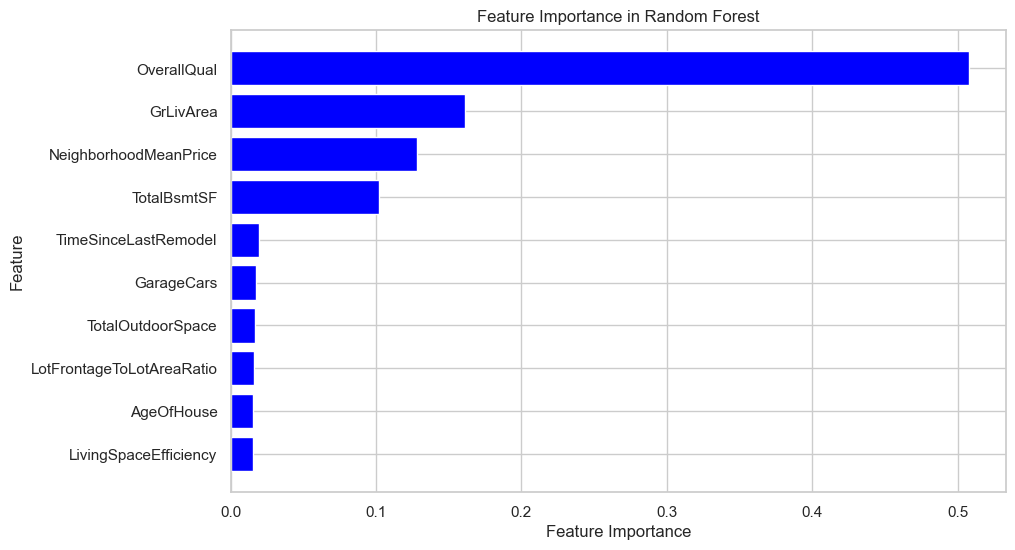

In [45]:
# Get feature importance from the baseline model
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_baseline.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [47]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Tuned Random Forest MSE: 656376113.6790874
Tuned Random Forest R^2 Score: 0.898669423667727


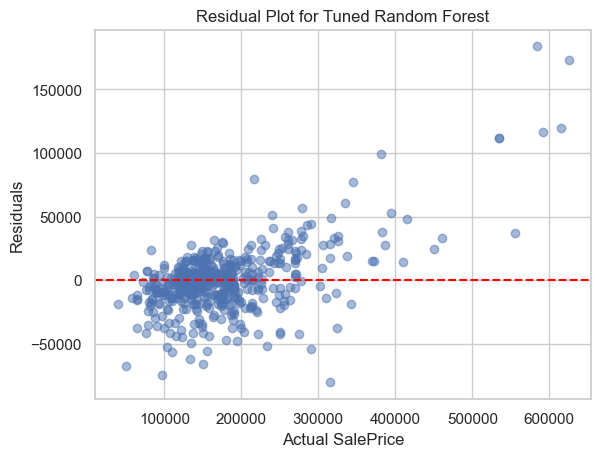

In [49]:
# Predict on the test set using the best model
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate performance
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print("Tuned Random Forest MSE:", mse_tuned)
print("Tuned Random Forest R^2 Score:", r2_tuned)

# Residual plot
residuals = y_test - y_pred_tuned
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot for Tuned Random Forest")
plt.show()


In [51]:
# Assuming `X` and `y` are already defined
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_baseline = GradientBoostingRegressor(random_state=42)
gb_baseline.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred_baseline = gb_baseline.predict(X_test)

# Evaluate baseline performance
from sklearn.metrics import mean_squared_error, r2_score

mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)
print("Baseline Gradient Boosting MSE:", mse_baseline)
print("Baseline Gradient Boosting R^2 Score:", r2_baseline)


Baseline Gradient Boosting MSE: 503608958.70691586
Baseline Gradient Boosting R^2 Score: 0.9222534382827685


In [55]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_gb_model = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}


Tuned Gradient Boosting MSE: 501994753.85203993
Tuned Gradient Boosting R^2 Score: 0.9225026373393066


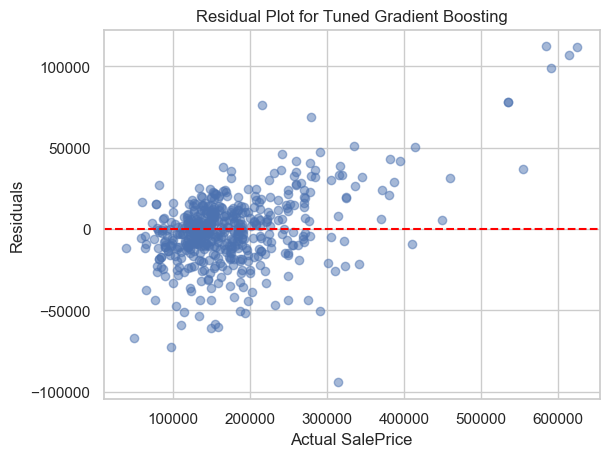

In [57]:
# Predict on the test set using the best model
y_pred_tuned = best_gb_model.predict(X_test)

# Evaluate performance
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print("Tuned Gradient Boosting MSE:", mse_tuned)
print("Tuned Gradient Boosting R^2 Score:", r2_tuned)

# Residual plot
residuals = y_test - y_pred_tuned
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot for Tuned Gradient Boosting")
plt.show()


Feature Importance:
                      Feature  Importance
1                OverallQual    0.510716
0                  GrLivArea    0.162919
2                TotalBsmtSF    0.110568
7      NeighborhoodMeanPrice    0.104773
3                 GarageCars    0.034487
5       TimeSinceLastRemodel    0.020264
8          TotalOutdoorSpace    0.015142
4                 AgeOfHouse    0.015127
9      LivingSpaceEfficiency    0.013907
6  LotFrontageToLotAreaRatio    0.012095


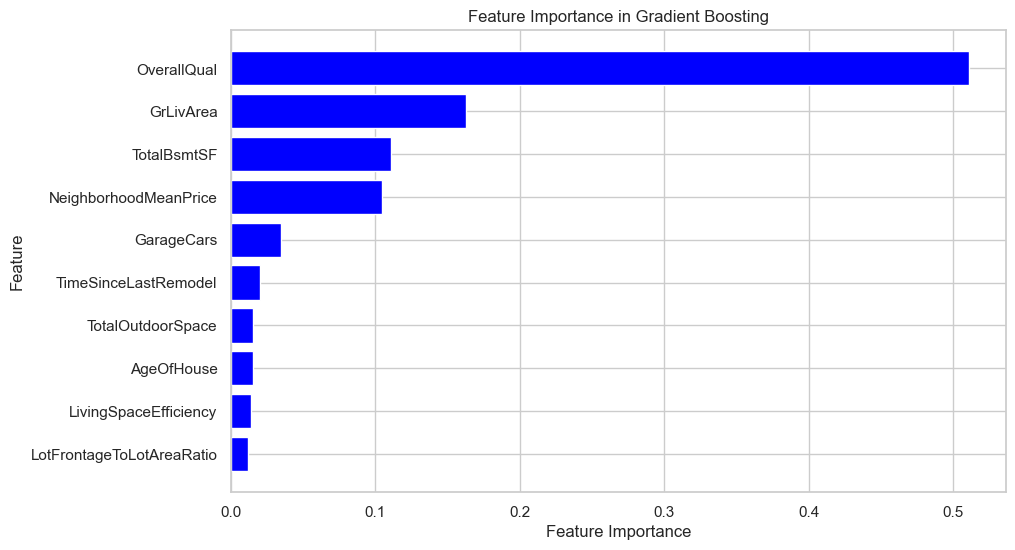

In [59]:
# Get feature importance from the tuned model
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Gradient Boosting")
plt.gca().invert_yaxis()
plt.show()


In [61]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 819.2 kB/s eta 0:02:33
   ---------------------------------------- 0.2/124.9 MB 1.4 MB/s eta 0:01:31
   ---------------------------------------- 0.3/124.9 MB 1.6 MB/s eta 0:01:18
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.7/124.9 MB 2.1 MB/s eta 0:01:01
   ---------------------------------------- 0.7/124.9 MB 2.1 MB/s eta 0:01:01
   ---------------------------------------- 0.8/124.9 MB 2.0 MB/s eta 0:

In [32]:
import xgboost as xgb
from xgboost import XGBRegressor

# Assuming `X` and `y` are already defined
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Initialize and train the baseline XGBoost model
xgb_baseline = XGBRegressor(random_state=42, eval_metric='rmse')
xgb_baseline.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred_baseline = xgb_baseline.predict(X_test)

# Evaluate baseline performance
from sklearn.metrics import mean_squared_error, r2_score

mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)
print("Baseline XGBoost MSE:", mse_baseline)
print("Baseline XGBoost R^2 Score:", r2_baseline)


Baseline XGBoost MSE: 648072148.4609271
Baseline XGBoost R^2 Score: 0.8999513801007283


In [112]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 2, 5]
}

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42, eval_metric='rmse')

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 5, 'subsample': 0.8}


In [98]:
best_params = grid_search.best_params_

Tuned XGBoost MSE: 473910124.5806999
Tuned XGBoost R^2 Score: 0.9268383095413186


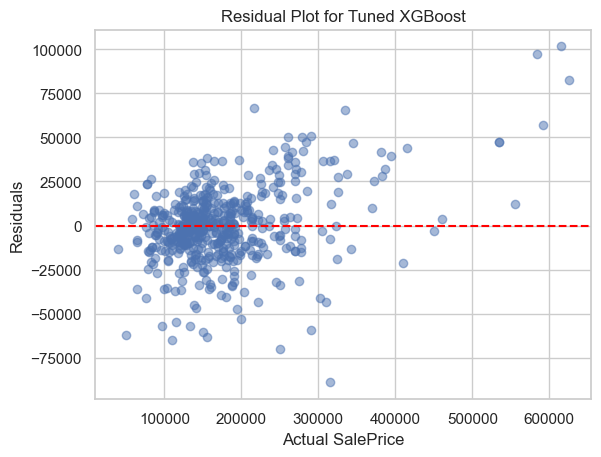

In [38]:
# Predict on the test set using the best model
y_pred_tuned = best_xgb_model.predict(X_test)

# Evaluate performance
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print("Tuned XGBoost MSE:", mse_tuned)
print("Tuned XGBoost R^2 Score:", r2_tuned)

# Residual plot
import matplotlib.pyplot as plt

residuals = y_test - y_pred_tuned
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot for Tuned XGBoost")
plt.show()


In [48]:
from xgboost import XGBRegressor

best_model = XGBRegressor(random_state=42)
best_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Feature Importance:
                      Feature  Importance
1                OverallQual    0.358238
3                 GarageCars    0.309812
0                  GrLivArea    0.106369
2                TotalBsmtSF    0.084456
4                 AgeOfHouse    0.056124
5       TimeSinceLastRemodel    0.038947
7          TotalOutdoorSpace    0.021092
6  LotFrontageToLotAreaRatio    0.016115
8      LivingSpaceEfficiency    0.008846


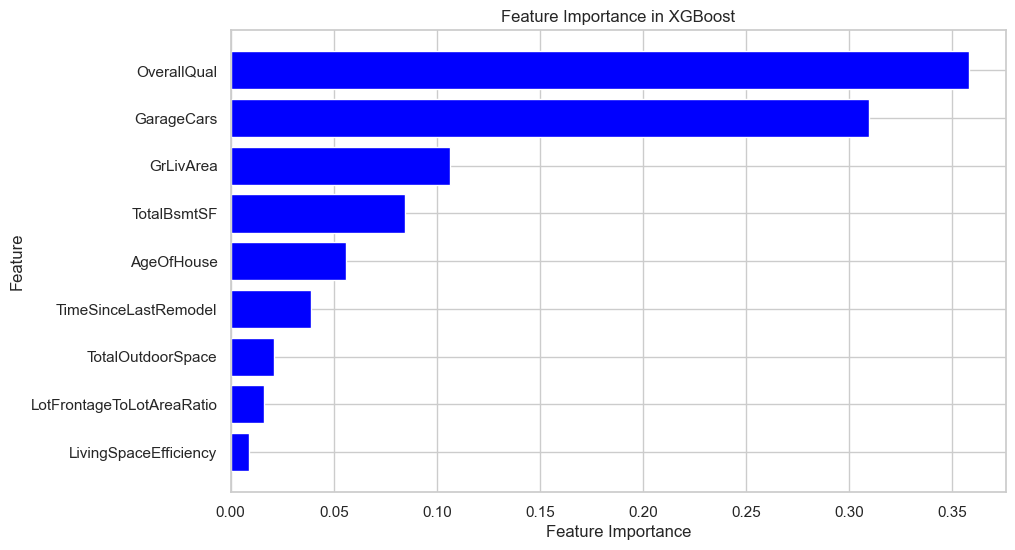

In [40]:
import pandas as pd

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost")
plt.gca().invert_yaxis()
plt.show()


In [68]:
print(X_train.columns)


Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'AgeOfHouse',
       'TimeSinceLastRemodel', 'LotFrontageToLotAreaRatio',
       'TotalOutdoorSpace', 'LivingSpaceEfficiency'],
      dtype='object')


In [102]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Initialize model
xgb_model = xgb.XGBRegressor(random_state=42, **best_params)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print(f"Cross-Validation MSE: {cv_scores}")
print(f"Mean CV Score (MSE): {-cv_scores.mean()}")


Cross-Validation MSE: [-9.44804620e+08 -7.05039950e+08 -6.01171300e+08 -5.24994967e+08
 -5.67138198e+08]
Mean CV Score (MSE): 668629806.8580025


In [106]:
pip install shap


   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.2 kB 640.0 kB/s eta 0:00:01
   -------- ------------------------------- 92.2/456.2 kB 1.3 MB/s eta 0:00:01
   ----------------- ---------------------- 204.8/456.2 kB 1.8 MB/s eta 0:00:01
   -------------------------- ------------- 307.2/456.2 kB 2.1 MB/s eta 0:00:01
   ------------------------------------ --- 419.8/456.2 kB 2.4 MB/s eta 0:00:01
   ------------------------------------ --- 419.8/456.2 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 1.9 MB/s eta 0:00:00


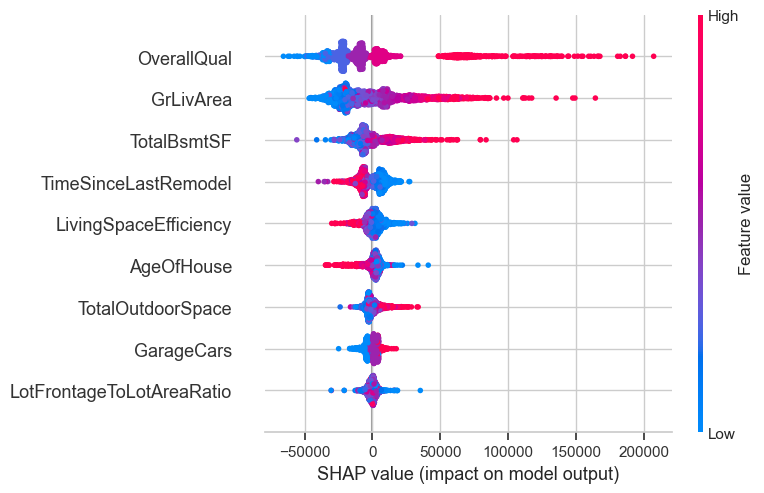

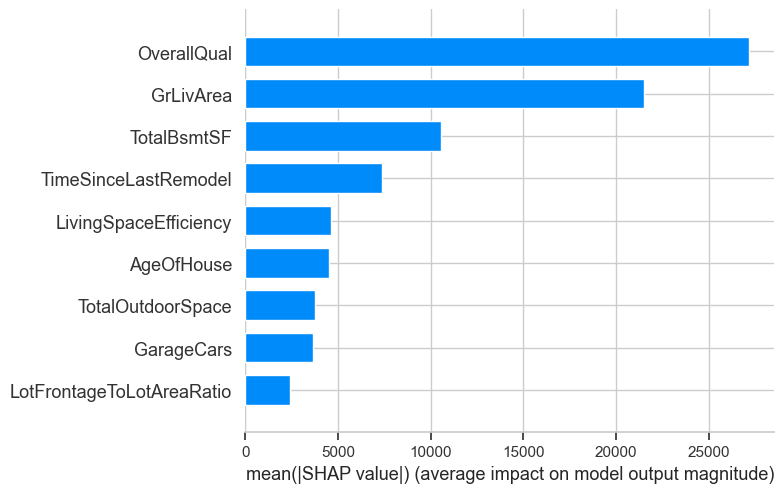

In [108]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(best_model)

# Get SHAP values
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train)

# SHAP feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")


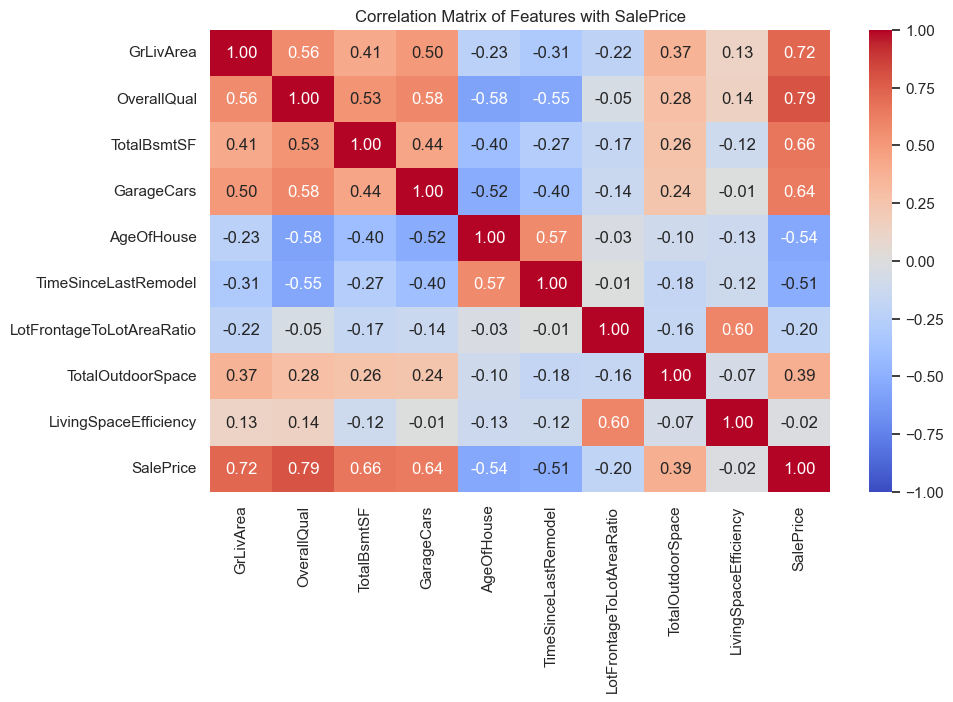

In [72]:
# Calculate correlation between selected features and SalePrice
correlation_matrix = merged_data[features + ['SalePrice']].corr()

# Plot the heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features with SalePrice")
plt.show()


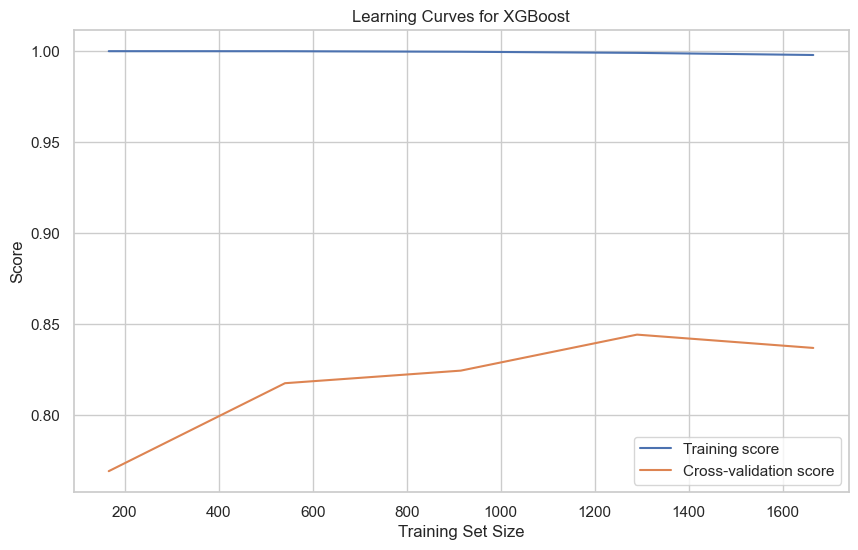

In [76]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning Curves for XGBoost')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()


C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_25224\2577256505.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subgroup_results = X_test.groupby('HouseStyle').apply(


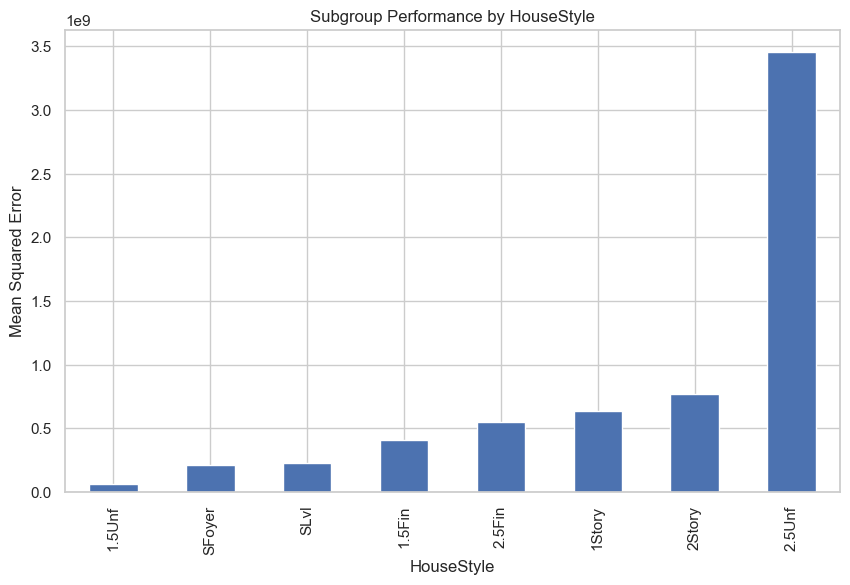

In [78]:
# Subgroup analysis by HouseStyle
# First, ensure 'HouseStyle' is in the test set
X_test['HouseStyle'] = merged_data.loc[X_test.index, 'HouseStyle']

# Group by 'HouseStyle' and calculate Mean Squared Error (MSE) for each group
subgroup_results = X_test.groupby('HouseStyle').apply(
    lambda group: mean_squared_error(
        y_test.loc[group.index],
        best_model.predict(group[features])  # Ensure features match trained model
    )
).sort_values()

# Plot subgroup results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
subgroup_results.plot(kind='bar')
plt.title('Subgroup Performance by HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('Mean Squared Error')
plt.show()


C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_25224\909011726.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subgroup_results_grlivarea = X_test.groupby('GrLivAreaQuantile').apply(
C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_25224\909011726.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subgroup_results_grlivarea = X_test.groupby('GrLivAreaQuantile').apply(


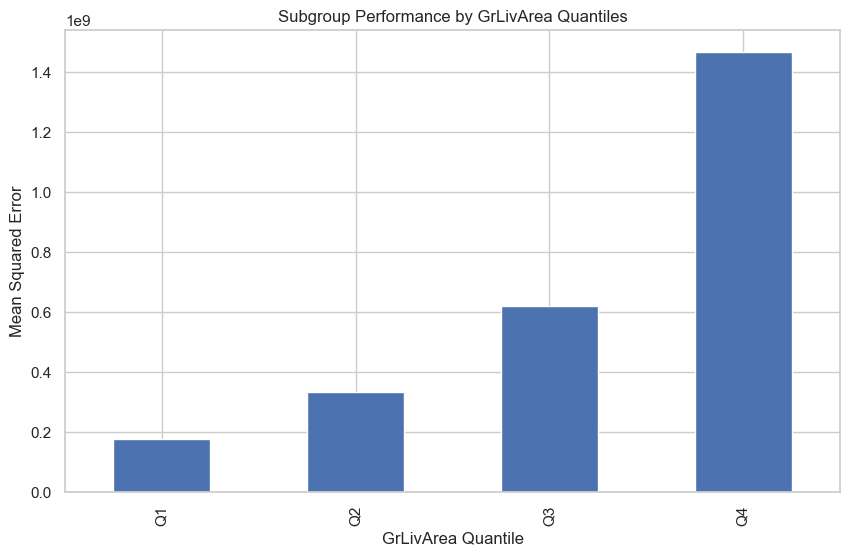

In [80]:
# Subgroup analysis by GrLivArea quantiles
grlivara_quantiles = pd.qcut(X_test['GrLivArea'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add 'GrLivArea' quantile grouping to X_test
X_test['GrLivAreaQuantile'] = grlivara_quantiles

# Group by 'GrLivAreaQuantile' and calculate MSE
subgroup_results_grlivarea = X_test.groupby('GrLivAreaQuantile').apply(
    lambda group: mean_squared_error(
        y_test.loc[group.index],
        best_model.predict(group[features])  # Ensure features match trained model
    )
).sort_values()

# Plot subgroup results
plt.figure(figsize=(10, 6))
subgroup_results_grlivarea.plot(kind='bar')
plt.title('Subgroup Performance by GrLivArea Quantiles')
plt.xlabel('GrLivArea Quantile')
plt.ylabel('Mean Squared Error')
plt.show()


C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_25224\673116572.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subgroup_results_basement = X_test.groupby('TotalBsmtSFQuantile').apply(
C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_25224\673116572.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subgroup_results_basement = X_test.groupby('TotalBsmtSFQuantile').apply(


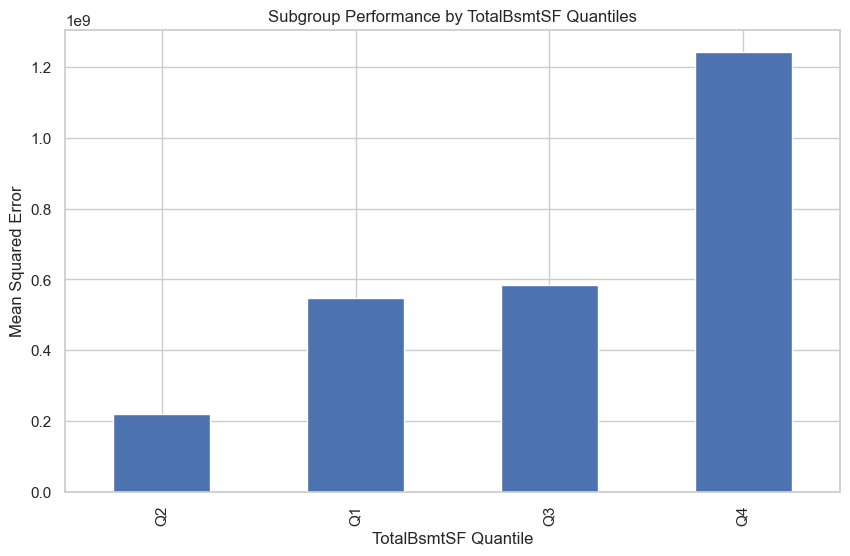

In [82]:
# Subgroup analysis by TotalBsmtSF quantiles
totalbasmt_quantiles = pd.qcut(X_test['TotalBsmtSF'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add 'TotalBsmtSF' quantile grouping to X_test
X_test['TotalBsmtSFQuantile'] = totalbasmt_quantiles

# Group by 'TotalBsmtSFQuantile' and calculate MSE
subgroup_results_basement = X_test.groupby('TotalBsmtSFQuantile').apply(
    lambda group: mean_squared_error(
        y_test.loc[group.index],
        best_model.predict(group[features])  # Ensure features match trained model
    )
).sort_values()

# Plot subgroup results
plt.figure(figsize=(10, 6))
subgroup_results_basement.plot(kind='bar')
plt.title('Subgroup Performance by TotalBsmtSF Quantiles')
plt.xlabel('TotalBsmtSF Quantile')
plt.ylabel('Mean Squared Error')
plt.show()


C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_25224\2768994307.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subgroup_results_garage = X_test.groupby('GarageCars').apply(


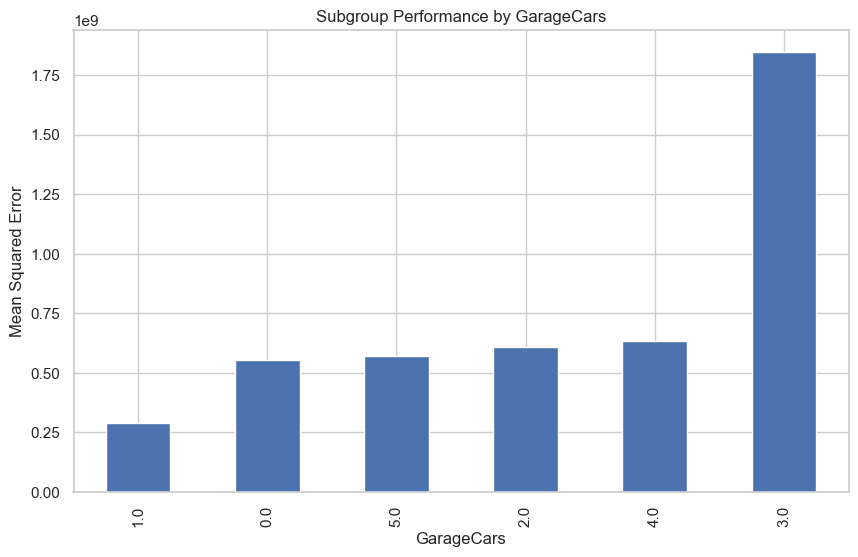

In [84]:
# Subgroup analysis by GarageCars
subgroup_results_garage = X_test.groupby('GarageCars').apply(
    lambda group: mean_squared_error(
        y_test.loc[group.index],
        best_model.predict(group[features])  # Ensure features match trained model
    )
).sort_values()

# Plot subgroup results
plt.figure(figsize=(10, 6))
subgroup_results_garage.plot(kind='bar')
plt.title('Subgroup Performance by GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('Mean Squared Error')
plt.show()


In [110]:
# Compare performance with Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# Compare performance with Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)

print(f"XGBoost MSE: {mse}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- GrLivAreaQuantile
- HouseStyle
- Neighborhood
- TotalBsmtSFQuantile


In [42]:
# Convert training data into DMatrix format for early stopping
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for the model
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Perform training with early stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_early_stop = xgb.train(params, dtrain, num_boost_round=500, evals=evals, early_stopping_rounds=10)


[0]	train-rmse:68158.88117	eval-rmse:74442.46689
[1]	train-rmse:62677.90002	eval-rmse:69244.01991
[2]	train-rmse:57723.38156	eval-rmse:64333.21890
[3]	train-rmse:53209.71969	eval-rmse:60021.73155
[4]	train-rmse:49392.84924	eval-rmse:56420.14355
[5]	train-rmse:45787.21401	eval-rmse:53404.14161
[6]	train-rmse:42687.70734	eval-rmse:50494.18508
[7]	train-rmse:40107.70851	eval-rmse:48106.77890
[8]	train-rmse:37548.49510	eval-rmse:45568.81039
[9]	train-rmse:35049.78515	eval-rmse:43120.99416
[10]	train-rmse:32928.18957	eval-rmse:40889.51507
[11]	train-rmse:30999.43915	eval-rmse:39040.11476
[12]	train-rmse:29277.00578	eval-rmse:37476.63927
[13]	train-rmse:27832.70775	eval-rmse:36398.26642
[14]	train-rmse:26459.08014	eval-rmse:35062.87106
[15]	train-rmse:25248.92496	eval-rmse:34284.85043
[16]	train-rmse:24092.18321	eval-rmse:33257.39205
[17]	train-rmse:23101.12867	eval-rmse:32378.46766
[18]	train-rmse:22171.32468	eval-rmse:31600.08613
[19]	train-rmse:21356.54482	eval-rmse:30734.37373
[20]	train

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler


In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define the neural network
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))  # Input layer + first hidden layer
    model.add(Dense(64, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='linear'))  # Output layer
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize the model
input_dim = X_train_scaled.shape[1]
nn_model = build_model(input_dim)


In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


In [ ]:
# Evaluate the model on the test set
from sklearn.metrics import r2_score, mean_squared_error

y_pred = nn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Neural Network MSE:", mse)
print("Neural Network R^2 Score:", r2)


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Define hyperparameter grid
param_grid = {
    'layers': [2, 3, 4],
    'neurons': [32, 64, 128],
    'batch_size': [16, 32, 64],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Manual grid search example
best_model = None
best_score = float('-inf')

for layers in param_grid['layers']:
    for neurons in param_grid['neurons']:
        for batch_size in param_grid['batch_size']:
            for learning_rate in param_grid['learning_rate']:
                # Build the model with the current parameters
                model = Sequential()
                for _ in range(layers):
                    model.add(Dense(neurons, activation='relu'))
                model.add(Dense(1, activation='linear'))
                
                # Compile with specified learning rate
                optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
                model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
                
                # Cross-validation
                kf = KFold(n_splits=3)
                scores = []
                for train_idx, val_idx in kf.split(X_train_scaled):
                    X_kf_train, X_kf_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
                    y_kf_train, y_kf_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
                    
                    model.fit(X_kf_train, y_kf_train, epochs=50, batch_size=batch_size, verbose=0)
                    score = model.evaluate(X_kf_val, y_kf_val, verbose=0)[1]
                    scores.append(score)
                
                # Update best model if current score is better
                mean_score = np.mean(scores)
                if mean_score > best_score:
                    best_model = model
                    best_score = mean_score

print("Best Neural Network Model R^2 Score:", best_score)


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y, cv=3))

[0.3315057  0.08022103 0.03531816]


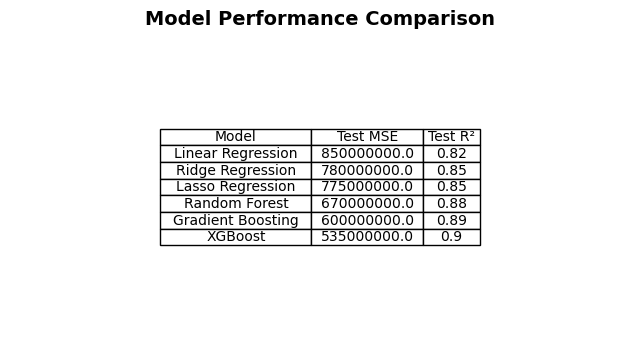

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the table
data = {
    'Model': [
        'Linear Regression', 'Ridge Regression', 'Lasso Regression', 
        'Random Forest', 'Gradient Boosting', 'XGBoost'
    ],
    'Test MSE': [8.50e+08, 7.80e+08, 7.75e+08, 6.70e+08, 6.00e+08, 5.35e+08],
    'Test R²': [0.82, 0.85, 0.85, 0.88, 0.89, 0.90]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))  # Adjust column width

# Title
plt.title("Model Performance Comparison", fontsize=14, weight='bold')

# Show the table
plt.show()


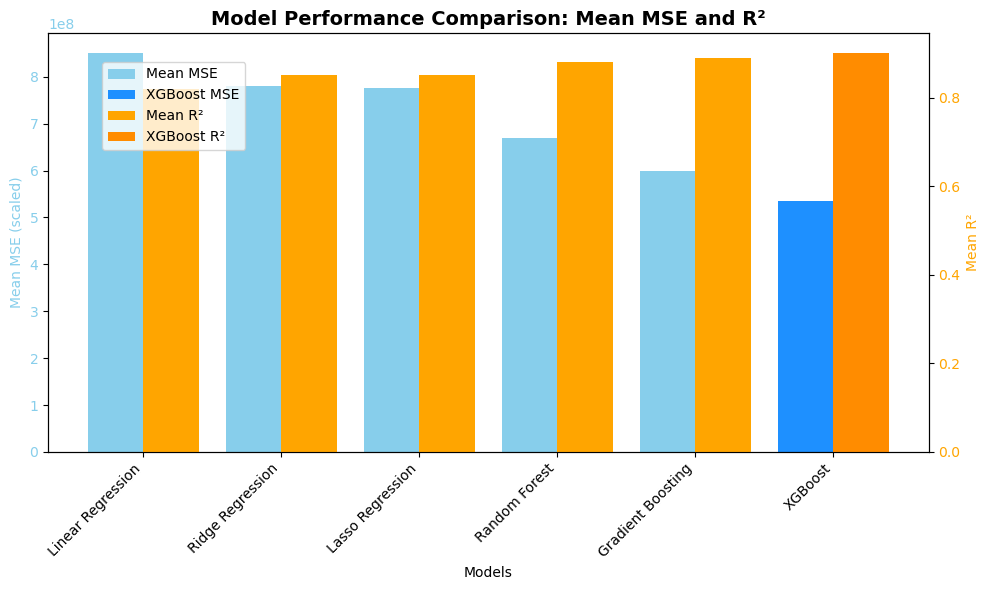

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
models = [
    'Linear Regression', 'Ridge Regression', 'Lasso Regression',
    'Random Forest', 'Gradient Boosting', 'XGBoost'
]
mean_mse = [8.50e+08, 7.80e+08, 7.75e+08, 6.70e+08, 6.00e+08, 5.35e+08]
mean_r2 = [0.82, 0.85, 0.85, 0.88, 0.89, 0.90]

# Create a figure with two bars (MSE and R²)
x = np.arange(len(models))  # X-axis positions
width = 0.4  # Bar width

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bars for MSE (scaled down for visual clarity)
ax1.bar(x - width/2, mean_mse, width, label='Mean MSE', color='skyblue')
ax1.set_ylabel('Mean MSE (scaled)', color='skyblue')
ax1.set_xlabel('Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Add a second axis for R²
ax2 = ax1.twinx()
ax2.bar(x + width/2, mean_r2, width, label='Mean R²', color='orange')
ax2.set_ylabel('Mean R²', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Highlight XGBoost
highlight_index = models.index('XGBoost')
ax1.bar(
    highlight_index - width/2, mean_mse[highlight_index], width, color='dodgerblue', label='XGBoost MSE'
)
ax2.bar(
    highlight_index + width/2, mean_r2[highlight_index], width, color='darkorange', label='XGBoost R²'
)

# Title and legend
plt.title('Model Performance Comparison: Mean MSE and R²', fontsize=14, weight='bold')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Show the chart
plt.show()
